# Motif enrichment analysis

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "./scripts")
import functions as f
from matplotlib import pyplot as plt
import seaborn as sns
from copy import copy
import multiprocessing as mp
import joblib
from tqdm import tqdm

In [2]:
cfg = f.get_actual_parametrization("./config.json")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: yeast


### Motifs library

There are conventional denotations for all possible triads as presented below

<img src="./pics/triads.png" width=2000 height=20/>

# Yeast Tnet

In [3]:
cfg = f.update_cfg("./config.json", "NETWORK_TO_SEARCH_IN", "yeast")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: yeast


In [4]:
interaction_matrix = f.get_interaction_matrix(cfg)

In [9]:
noise_list = np.linspace(0, 80000, 11).astype(int)
score_list = []
for noise in tqdm(noise_list):
    shuffled_matrix = f.get_shuffled_matrix(interaction_matrix, noise)
    score_list.append(1-f.corruption_score(interaction_matrix, shuffled_matrix))

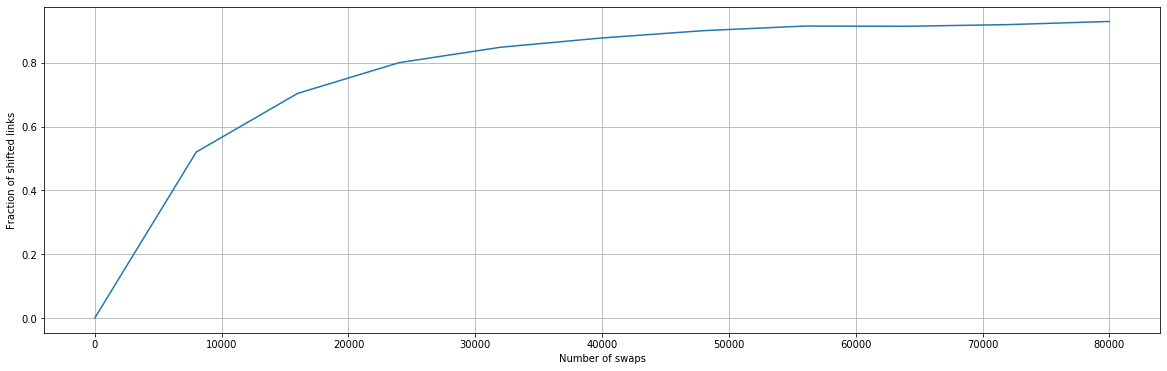

In [6]:
plt.figure(figsize=(20, 6))
plt.grid()
plt.ylabel("Fraction of shifted links")
plt.xlabel("Number of swaps")
plt.plot(noise_list, score_list);

60k swaps is enough to shuffle original matrix to random state

In [7]:
%%time
shuffled_matrix = f.get_shuffled_matrix(interaction_matrix, 60000)

CPU times: user 8.47 s, sys: 185 ms, total: 8.65 s
Wall time: 8.61 s


In [8]:
print(f"Links before: {interaction_matrix.sum():.0f}\tLinks after: {shuffled_matrix.sum():.0f}")

Links before: 12873	Links after: 12873


In [9]:
if (shuffled_matrix.sum(axis=0) == interaction_matrix.sum(axis=0)).all() and \
    (shuffled_matrix.sum(axis=1) == interaction_matrix.sum(axis=1)).all():
    print("All in/out degrees have been preserved")
else:
    print("WARNING! Degree distribution shifted")

All in/out degrees have been preserved


In [10]:
print(f"Fraction of original linkfs which moved out: {1-f.corruption_score(interaction_matrix, shuffled_matrix):.2f}")

Fraction of original linkfs which moved out: 0.92


# Ecoli Tnet

In [11]:
cfg = f.update_cfg("./config.json", "NETWORK_TO_SEARCH_IN", "ecoli")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: ecoli


In [12]:
interaction_matrix = f.get_interaction_matrix(cfg)

In [13]:
noise_list = np.linspace(0, 80000, 11).astype(int)
score_list = []
for noise in tqdm(noise_list):
    shuffled_matrix = f.get_shuffled_matrix(interaction_matrix, noise)
    score_list.append(1-f.corruption_score(interaction_matrix, shuffled_matrix))

100%|██████████| 11/11 [00:19<00:00,  1.74s/it]


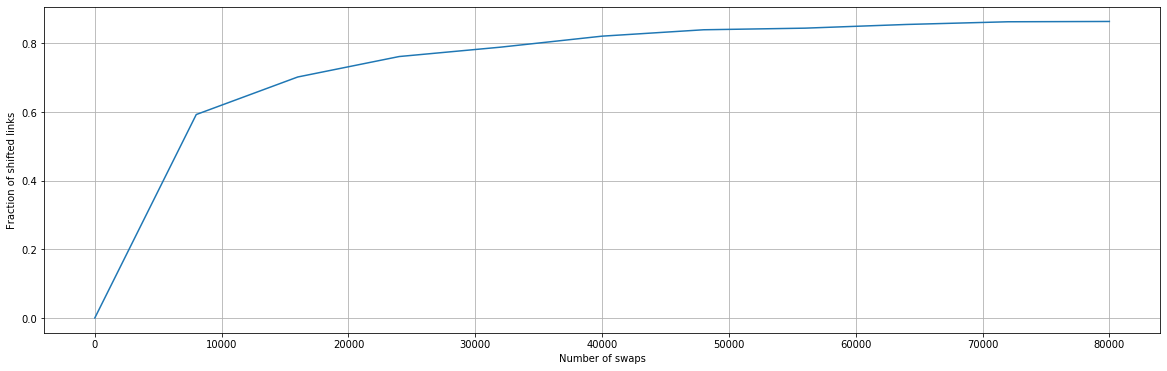

In [14]:
plt.figure(figsize=(20, 6))
plt.grid()
plt.ylabel("Fraction of shifted links")
plt.xlabel("Number of swaps")
plt.plot(noise_list, score_list);

70k swaps is enough to shuffle original matrix to random state

In [24]:
%%time
shuffled_matrix = f.get_shuffled_matrix(interaction_matrix, 70000)

CPU times: user 3.01 s, sys: 15.9 ms, total: 3.03 s
Wall time: 3.01 s


In [25]:
print(f"Links before: {interaction_matrix.sum():.0f}\tLinks after: {shuffled_matrix.sum():.0f}")

Links before: 4462	Links after: 4462


In [26]:
if (shuffled_matrix.sum(axis=0) == interaction_matrix.sum(axis=0)).all() and \
    (shuffled_matrix.sum(axis=1) == interaction_matrix.sum(axis=1)).all():
    print("All in/out degrees have been preserved")
else:
    print("WARNING! Degree distribution shifted")

All in/out degrees have been preserved


In [27]:
print(f"Fraction of original linkfs which moved out: {1-f.corruption_score(interaction_matrix, shuffled_matrix):.2f}")

Fraction of original linkfs which moved out: 0.86


# GS 0.1 net

In [28]:
cfg = f.update_cfg("./config.json", "NETWORK_TO_SEARCH_IN", "gs0.1")

RANDOM_SEED: 19
TEST_NETWORK_SIZE: 500
TEST_NETWORK_LINK_PROB: 0.1
N_CORES_TO_USE: -1
NETWORK_TO_SEARCH_IN: gs0.1


In [29]:
interaction_matrix = f.get_interaction_matrix(cfg)

In [30]:
noise_list = np.linspace(0, 80000, 11).astype(int)
score_list = []
for noise in tqdm(noise_list):
    shuffled_matrix = f.get_shuffled_matrix(interaction_matrix, noise)
    score_list.append(1-f.corruption_score(interaction_matrix, shuffled_matrix))

100%|██████████| 11/11 [00:03<00:00,  2.77it/s]


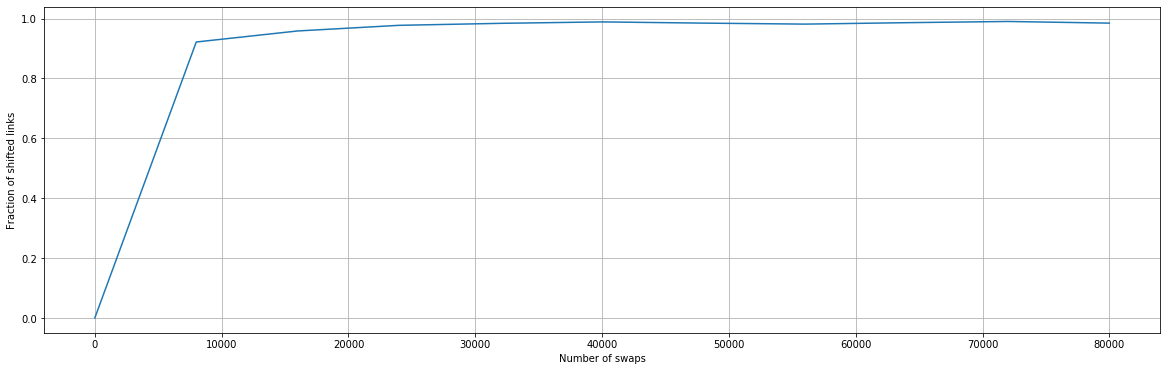

In [31]:
plt.figure(figsize=(20, 6))
plt.grid()
plt.ylabel("Fraction of shifted links")
plt.xlabel("Number of swaps")
plt.plot(noise_list, score_list);

40k swaps is enough to shuffle original matrix to random state

In [32]:
%%time
shuffled_matrix = f.get_shuffled_matrix(interaction_matrix, 40000)

CPU times: user 257 ms, sys: 1.23 ms, total: 258 ms
Wall time: 258 ms


In [33]:
print(f"Links before: {interaction_matrix.sum():.0f}\tLinks after: {shuffled_matrix.sum():.0f}")

Links before: 2713	Links after: 2713


In [34]:
if (shuffled_matrix.sum(axis=0) == interaction_matrix.sum(axis=0)).all() and \
    (shuffled_matrix.sum(axis=1) == interaction_matrix.sum(axis=1)).all():
    print("All in/out degrees have been preserved")
else:
    print("WARNING! Degree distribution shifted")

All in/out degrees have been preserved


In [35]:
print(f"Fraction of original linkfs which moved out: {1-f.corruption_score(interaction_matrix, shuffled_matrix):.2f}")

Fraction of original linkfs which moved out: 0.98
